In [302]:
from datetime import datetime, timedelta
from pandas import DataFrame
import matplotlib.pyplot as plt
import networkx as nx
from networkx import Graph
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from networkx.readwrite import json_graph
import os
from random import randint
import sys
from typing import Tuple

In [303]:
sys.path.append("../")
tests_dir = os.path.abspath("../tests")
sys.path.append(tests_dir)

In [304]:
from traffic_simulator.city_map import CityMap
from traffic_simulator.model import TimeDeltaDiff
from traffic_simulator.traffic_analysis import TrafficAnalyzer
from traffic_simulator.traffic_simulation import Simulator
from conftest import generate_static_city_map, generate_static_trips

##### Generate City Map

In [305]:
r2_city_map = generate_static_city_map()
r2_city_map

In [306]:
CityMap.get_city_map_statistics(r2_city_map)

node degree and node clustering
0 2 0
1 2 0
4 3 0
3 2 0
2 1 0

the adjacency list
0 1 4
1 3
4 2 3
3
2


{(0, 1): 6, (0, 4): 9, (1, 3): 11, (4, 2): 10, (4, 3): 7}


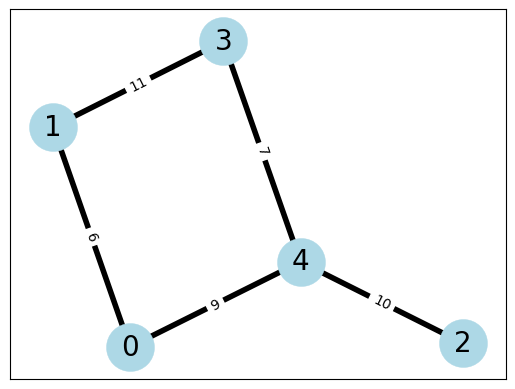

In [307]:
CityMap.visualize_city_map(r2_city_map)

# Generate Static Trips

In [308]:
r2_trips = generate_static_trips()
len(r2_trips)

20

In [309]:
r2_trips

{Trip(source=0, destination=2, numer_of_trips=1): Trip(source=0, destination=2, numer_of_trips=1),
 Trip(source=2, destination=0, numer_of_trips=1): Trip(source=2, destination=0, numer_of_trips=1),
 Trip(source=0, destination=3, numer_of_trips=1): Trip(source=0, destination=3, numer_of_trips=1),
 Trip(source=3, destination=0, numer_of_trips=1): Trip(source=3, destination=0, numer_of_trips=1),
 Trip(source=1, destination=2, numer_of_trips=1): Trip(source=1, destination=2, numer_of_trips=1),
 Trip(source=2, destination=1, numer_of_trips=2): Trip(source=2, destination=1, numer_of_trips=2),
 Trip(source=1, destination=4, numer_of_trips=1): Trip(source=1, destination=4, numer_of_trips=1),
 Trip(source=4, destination=1, numer_of_trips=2): Trip(source=4, destination=1, numer_of_trips=2),
 Trip(source=2, destination=3, numer_of_trips=3): Trip(source=2, destination=3, numer_of_trips=3),
 Trip(source=3, destination=2, numer_of_trips=1): Trip(source=3, destination=2, numer_of_trips=1),
 Trip(sour

# R2

#### The benefit values of constructing the following new roads:
#### (0,2), (0,3), (1,2), (1,4), (2,3)
#### Use a k value (budget) of 2, which two of the above roads would you recommend for construction? Remember that once the first road is 
#### constructed, benefits that you initially computed for the other 4 will now change and these will need to be recomputed.

##### Generate Benefit Matrix k = 0 # Initial Benefit Matrix

In [310]:
def get_max_benefit_road_segment(max_benefit_matrix: DataFrame) -> Tuple[int, int]:
    max_benefit = max_benefit_matrix.iloc[0].values
    source = int(max_benefit[0])
    destination = int(max_benefit[1])
    
    return source, destination

In [311]:
r2_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r2_city_map, r2_trips)
r2_benefit_matrix

,source,destination,benefit
3,2,3,38.6
4,0,2,38.0
2,1,4,36.0
0,1,2,30.0
1,0,3,12.8


In [312]:
##### k = 1 # Recommended road to build first is the road segment (2,3)
r2_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r2_benefit_matrix)
r2_max_benefit_matrix

,source,destination,benefit
3,2,3,38.6


In [313]:
source, destination = get_max_benefit_road_segment(r2_max_benefit_matrix)
print(f"({source}, {destination})")

(2, 3)


{(0, 1): 6, (0, 4): 9, (1, 3): 11, (4, 2): 10, (4, 3): 7, (3, 2): 10.2}


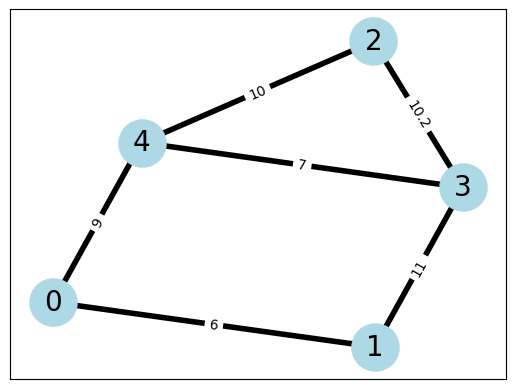

In [314]:
CityMap.add_road_segment(r2_city_map, source, destination)
CityMap.visualize_city_map(r2_city_map)

In [315]:
r2_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r2_city_map, r2_trips)
r2_benefit_matrix

,source,destination,benefit
1,0,2,26.6
0,1,2,26.0
3,1,4,24.6
2,0,3,12.8


In [316]:
##### k = 2 # Next recommended road to be built is the road segment (0,2)
r2_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r2_benefit_matrix)
r2_max_benefit_matrix

,source,destination,benefit
1,0,2,26.6


In [317]:
source, destination = get_max_benefit_road_segment(r2_max_benefit_matrix)
print(f"({source}, {destination})")

(0, 2)


{(0, 1): 6, (0, 4): 9, (0, 2): 11.4, (1, 3): 11, (4, 2): 10, (4, 3): 7, (3, 2): 10.2}


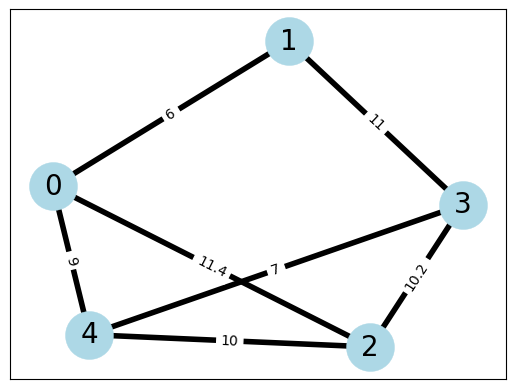

In [318]:
CityMap.add_road_segment(r2_city_map, source, destination)
CityMap.visualize_city_map(r2_city_map)

# R3

In [319]:
r3_city_map = Simulator.generate_map()
r3_city_map

In [320]:
r4_city_map = r3_city_map.copy()
r4_city_map

In [321]:
CityMap.get_city_map_statistics(r3_city_map)

node degree and node clustering
0 9 0.08333333333333333
1 9 0.1111111111111111
2 6 0.06666666666666667
3 6 0
4 8 0.14285714285714285
5 5 0
6 9 0.1388888888888889
7 5 0.1
8 11 0.16363636363636364
9 11 0.16363636363636364
10 8 0.03571428571428571
11 6 0.26666666666666666
12 12 0.13636363636363635
13 10 0.08888888888888889
14 16 0.11666666666666667
15 7 0.2857142857142857
16 9 0.05555555555555555
17 6 0.06666666666666667
18 11 0.07272727272727272
19 4 0.3333333333333333
20 6 0.06666666666666667
21 9 0.19444444444444445
22 5 0.1
23 8 0.21428571428571427
24 6 0.2
25 7 0.09523809523809523
26 6 0.2
27 9 0.2222222222222222
28 6 0.13333333333333333
29 11 0.16363636363636364
30 7 0.14285714285714285
31 13 0.16666666666666666
32 4 0.16666666666666666
33 7 0.047619047619047616
34 10 0.08888888888888889
35 5 0.1
36 1 0
37 4 0
38 3 0
39 7 0.14285714285714285
40 11 0.16363636363636364
41 7 0.09523809523809523
42 10 0.13333333333333333
43 8 0.03571428571428571
44 8 0.14285714285714285
45 16 0.09166666

{(0, 20): 10, (0, 3): 15, (0, 35): 16, (0, 59): 14, (0, 14): 11, (0, 27): 25, (0, 47): 20, (0, 32): 17, (0, 5): 12, (1, 12): 14, (1, 52): 25, (1, 50): 24, (1, 58): 23, (1, 39): 17, (1, 15): 7, (1, 13): 20, (1, 8): 16, (1, 22): 24, (2, 11): 14, (2, 3): 10, (2, 54): 23, (2, 8): 25, (2, 48): 6, (2, 20): 12, (3, 10): 12, (3, 38): 25, (3, 13): 18, (3, 31): 6, (4, 22): 25, (4, 14): 23, (4, 55): 16, (4, 6): 16, (4, 44): 24, (4, 5): 8, (4, 45): 15, (4, 15): 22, (5, 18): 25, (5, 31): 7, (5, 54): 8, (6, 25): 10, (6, 45): 25, (6, 31): 19, (6, 12): 9, (6, 46): 20, (6, 27): 12, (6, 21): 5, (6, 36): 21, (7, 12): 5, (7, 18): 11, (7, 22): 14, (7, 25): 10, (7, 45): 6, (8, 14): 7, (8, 23): 7, (8, 40): 5, (8, 35): 15, (8, 52): 5, (8, 51): 24, (8, 15): 24, (8, 34): 25, (8, 42): 20, (9, 31): 20, (9, 28): 12, (9, 56): 16, (9, 49): 17, (9, 48): 13, (9, 55): 11, (9, 46): 23, (9, 11): 22, (9, 47): 23, (9, 45): 5, (9, 58): 5, (10, 29): 19, (10, 16): 12, (10, 45): 20, (10, 54): 19, (10, 50): 9, (10, 30): 8, (10,

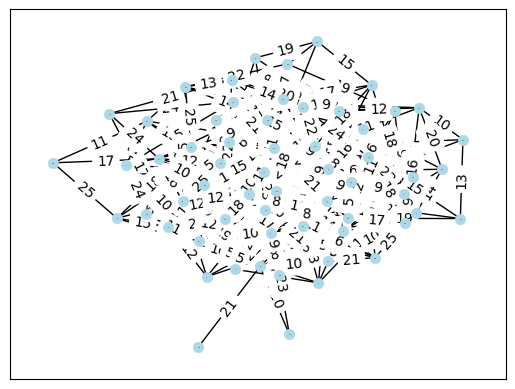

In [322]:
CityMap.visualize_city_map(r3_city_map, location_size=60, location_font_size=1, road_widths=1)

In [323]:
def get_traffic_times() -> Tuple[datetime, datetime]: 
    # (8 AM - 6 PM) # 10 hour time span
    start_time = datetime.strptime('08:00', '%H:%M').time()
    end_time = datetime.strptime('18:00', '%H:%M').time()
    
    start_date = datetime.now() - timedelta(days=30)
    random_start_datetime = datetime.combine(start_date.date(), start_time)
    
    random_end_datetime = random_start_datetime + timedelta(hours=10)

    return random_start_datetime, random_end_datetime
    
traffic_start_datetime, traffic_end_datetime = get_traffic_times()

print("Traffic start datetime:", traffic_start_datetime)
print("Traffic end datetime", traffic_end_datetime)

Traffic start datetime: 2024-01-14 08:00:00
Traffic end datetime 2024-01-14 18:00:00


In [324]:
r3_r4_trips = Simulator.generate_trips(city_map,
                                 traffic_start_datetime,
                                 traffic_end_datetime,
                                 TimeDeltaDiff.SECONDS)
r3_r4_number_of_trips = 0

for trip in r3_r4_trips:
    r3_r4_number_of_trips += trip.numer_of_trips

r3_r4_number_of_trips

36000

In [325]:
r3_r4_trips

{Trip(source=29, destination=35, numer_of_trips=12): Trip(source=29, destination=35, numer_of_trips=12),
 Trip(source=39, destination=42, numer_of_trips=9): Trip(source=39, destination=42, numer_of_trips=9),
 Trip(source=15, destination=51, numer_of_trips=11): Trip(source=15, destination=51, numer_of_trips=11),
 Trip(source=49, destination=18, numer_of_trips=8): Trip(source=49, destination=18, numer_of_trips=8),
 Trip(source=26, destination=17, numer_of_trips=17): Trip(source=26, destination=17, numer_of_trips=17),
 Trip(source=39, destination=56, numer_of_trips=19): Trip(source=39, destination=56, numer_of_trips=19),
 Trip(source=0, destination=19, numer_of_trips=16): Trip(source=0, destination=19, numer_of_trips=16),
 Trip(source=57, destination=23, numer_of_trips=9): Trip(source=57, destination=23, numer_of_trips=9),
 Trip(source=13, destination=29, numer_of_trips=10): Trip(source=13, destination=29, numer_of_trips=10),
 Trip(source=39, destination=50, numer_of_trips=13): Trip(sourc

In [326]:
r3_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r3_city_map, r3_r4_trips)
r3_benefit_matrix

,source,destination,benefit
1519,14,34,3732.0
112,12,47,3190.0
1270,12,56,3136.2
274,0,49,2936.4
1188,29,31,2924.4
...,...,...,...
421,2,31,102.4
195,2,39,100.8
1408,13,43,96.0
1134,11,33,61.6


In [327]:
##### k = 1 # Recommended road to build first is the road segment
r3_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r3_benefit_matrix)
r3_max_benefit_matrix

,source,destination,benefit
1519,14,34,3732.0


In [328]:
source, destination = get_max_benefit_road_segment(r3_max_benefit_matrix)
print(f"({source}, {destination})")

(14, 34)


In [329]:
CityMap.add_road_segment(r3_city_map, source, destination)

{(0, 20): 10, (0, 3): 15, (0, 35): 16, (0, 59): 14, (0, 14): 11, (0, 27): 25, (0, 47): 20, (0, 32): 17, (0, 5): 12, (1, 12): 14, (1, 52): 25, (1, 50): 24, (1, 58): 23, (1, 39): 17, (1, 15): 7, (1, 13): 20, (1, 8): 16, (1, 22): 24, (2, 11): 14, (2, 3): 10, (2, 54): 23, (2, 8): 25, (2, 48): 6, (2, 20): 12, (3, 10): 12, (3, 38): 25, (3, 13): 18, (3, 31): 6, (4, 22): 25, (4, 14): 23, (4, 55): 16, (4, 6): 16, (4, 44): 24, (4, 5): 8, (4, 45): 15, (4, 15): 22, (5, 18): 25, (5, 31): 7, (5, 54): 8, (6, 25): 10, (6, 45): 25, (6, 31): 19, (6, 12): 9, (6, 46): 20, (6, 27): 12, (6, 21): 5, (6, 36): 21, (7, 12): 5, (7, 18): 11, (7, 22): 14, (7, 25): 10, (7, 45): 6, (8, 14): 7, (8, 23): 7, (8, 40): 5, (8, 35): 15, (8, 52): 5, (8, 51): 24, (8, 15): 24, (8, 34): 25, (8, 42): 20, (9, 31): 20, (9, 28): 12, (9, 56): 16, (9, 49): 17, (9, 48): 13, (9, 55): 11, (9, 46): 23, (9, 11): 22, (9, 47): 23, (9, 45): 5, (9, 58): 5, (10, 29): 19, (10, 16): 12, (10, 45): 20, (10, 54): 19, (10, 50): 9, (10, 30): 8, (10,

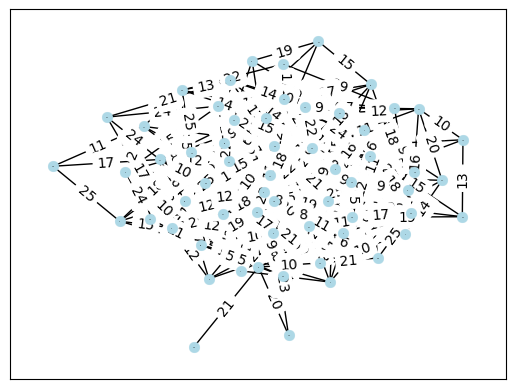

In [330]:
CityMap.visualize_city_map(r3_city_map, location_size=60, location_font_size=1, road_widths=1)

In [331]:
r3_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r3_city_map, r3_r4_trips)
r3_benefit_matrix

,source,destination,benefit
98,12,34,3700.6
1270,12,56,3136.2
1234,6,14,2987.2
274,0,49,2936.4
1188,29,31,2924.4
...,...,...,...
79,13,22,98.8
1128,7,27,96.8
1408,13,43,96.0
1134,11,33,61.6


In [332]:
##### k = 2 # Recommended road to build first is the road segment
r3_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r3_benefit_matrix)
r3_max_benefit_matrix

,source,destination,benefit
98,12,34,3700.6


In [333]:
source, destination = get_max_benefit_road_segment(r3_max_benefit_matrix)
print(f"({source}, {destination})")

(12, 34)


In [334]:
CityMap.add_road_segment(r3_city_map, source, destination)

{(0, 20): 10, (0, 3): 15, (0, 35): 16, (0, 59): 14, (0, 14): 11, (0, 27): 25, (0, 47): 20, (0, 32): 17, (0, 5): 12, (1, 12): 14, (1, 52): 25, (1, 50): 24, (1, 58): 23, (1, 39): 17, (1, 15): 7, (1, 13): 20, (1, 8): 16, (1, 22): 24, (2, 11): 14, (2, 3): 10, (2, 54): 23, (2, 8): 25, (2, 48): 6, (2, 20): 12, (3, 10): 12, (3, 38): 25, (3, 13): 18, (3, 31): 6, (4, 22): 25, (4, 14): 23, (4, 55): 16, (4, 6): 16, (4, 44): 24, (4, 5): 8, (4, 45): 15, (4, 15): 22, (5, 18): 25, (5, 31): 7, (5, 54): 8, (6, 25): 10, (6, 45): 25, (6, 31): 19, (6, 12): 9, (6, 46): 20, (6, 27): 12, (6, 21): 5, (6, 36): 21, (7, 12): 5, (7, 18): 11, (7, 22): 14, (7, 25): 10, (7, 45): 6, (8, 14): 7, (8, 23): 7, (8, 40): 5, (8, 35): 15, (8, 52): 5, (8, 51): 24, (8, 15): 24, (8, 34): 25, (8, 42): 20, (9, 31): 20, (9, 28): 12, (9, 56): 16, (9, 49): 17, (9, 48): 13, (9, 55): 11, (9, 46): 23, (9, 11): 22, (9, 47): 23, (9, 45): 5, (9, 58): 5, (10, 29): 19, (10, 16): 12, (10, 45): 20, (10, 54): 19, (10, 50): 9, (10, 30): 8, (10,

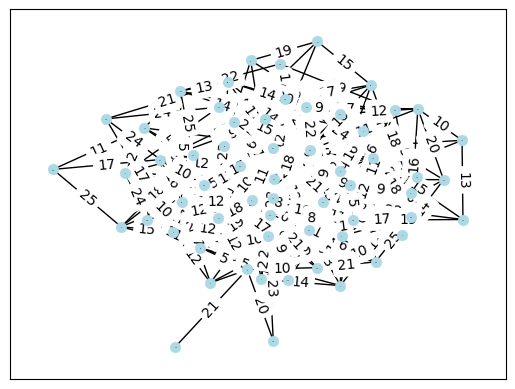

In [335]:
CityMap.visualize_city_map(r3_city_map, location_size=60, location_font_size=1, road_widths=1)

In [336]:
r3_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r3_city_map, r3_r4_trips)
r3_benefit_matrix

,source,destination,benefit
1269,12,56,3539.4
131,31,37,2992.6
273,0,49,2936.4
1187,29,31,2924.4
111,12,47,2866.0
...,...,...,...
79,13,22,98.8
1127,7,27,96.8
1407,13,43,96.0
1133,11,33,61.6


In [337]:
##### k = 3 # Recommended road to build last is the road segment (14,18)
r3_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r3_benefit_matrix)
r3_max_benefit_matrix

,source,destination,benefit
1269,12,56,3539.4


In [338]:
source, destination = get_max_benefit_road_segment(r3_max_benefit_matrix)
print(f"({source}, {destination})")

(12, 56)


In [339]:
CityMap.add_road_segment(r3_city_map, source, destination)

{(0, 20): 10, (0, 3): 15, (0, 35): 16, (0, 59): 14, (0, 14): 11, (0, 27): 25, (0, 47): 20, (0, 32): 17, (0, 5): 12, (1, 12): 14, (1, 52): 25, (1, 50): 24, (1, 58): 23, (1, 39): 17, (1, 15): 7, (1, 13): 20, (1, 8): 16, (1, 22): 24, (2, 11): 14, (2, 3): 10, (2, 54): 23, (2, 8): 25, (2, 48): 6, (2, 20): 12, (3, 10): 12, (3, 38): 25, (3, 13): 18, (3, 31): 6, (4, 22): 25, (4, 14): 23, (4, 55): 16, (4, 6): 16, (4, 44): 24, (4, 5): 8, (4, 45): 15, (4, 15): 22, (5, 18): 25, (5, 31): 7, (5, 54): 8, (6, 25): 10, (6, 45): 25, (6, 31): 19, (6, 12): 9, (6, 46): 20, (6, 27): 12, (6, 21): 5, (6, 36): 21, (7, 12): 5, (7, 18): 11, (7, 22): 14, (7, 25): 10, (7, 45): 6, (8, 14): 7, (8, 23): 7, (8, 40): 5, (8, 35): 15, (8, 52): 5, (8, 51): 24, (8, 15): 24, (8, 34): 25, (8, 42): 20, (9, 31): 20, (9, 28): 12, (9, 56): 16, (9, 49): 17, (9, 48): 13, (9, 55): 11, (9, 46): 23, (9, 11): 22, (9, 47): 23, (9, 45): 5, (9, 58): 5, (10, 29): 19, (10, 16): 12, (10, 45): 20, (10, 54): 19, (10, 50): 9, (10, 30): 8, (10,

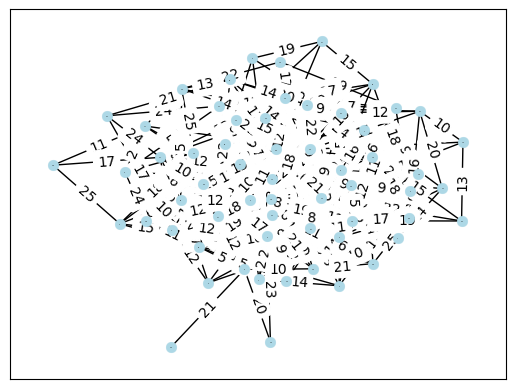

In [340]:
CityMap.visualize_city_map(r3_city_map, location_size=60, location_font_size=1, road_widths=1)

# R4

In [341]:
r4_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r4_city_map, r3_r4_trips, shrinkage_factor=0.8)
r4_benefit_matrix

,source,destination,benefit
112,12,47,1461.0
1519,14,34,1378.0
274,0,49,1371.4
438,14,18,1350.0
1270,12,56,1337.8
...,...,...,...
817,17,43,48.4
39,6,15,48.0
1408,13,43,48.0
1134,11,33,30.8


In [342]:
##### k = 1 # Recommended road to build first is the road segment
r4_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r4_benefit_matrix)
r4_max_benefit_matrix

,source,destination,benefit
112,12,47,1461.0


In [343]:
source, destination = get_max_benefit_road_segment(r4_max_benefit_matrix)
print(f"({source}, {destination})")

(12, 47)


In [344]:
CityMap.add_road_segment(r4_city_map, source, destination)

{(0, 20): 10, (0, 3): 15, (0, 35): 16, (0, 59): 14, (0, 14): 11, (0, 27): 25, (0, 47): 20, (0, 32): 17, (0, 5): 12, (1, 12): 14, (1, 52): 25, (1, 50): 24, (1, 58): 23, (1, 39): 17, (1, 15): 7, (1, 13): 20, (1, 8): 16, (1, 22): 24, (2, 11): 14, (2, 3): 10, (2, 54): 23, (2, 8): 25, (2, 48): 6, (2, 20): 12, (3, 10): 12, (3, 38): 25, (3, 13): 18, (3, 31): 6, (4, 22): 25, (4, 14): 23, (4, 55): 16, (4, 6): 16, (4, 44): 24, (4, 5): 8, (4, 45): 15, (4, 15): 22, (5, 18): 25, (5, 31): 7, (5, 54): 8, (6, 25): 10, (6, 45): 25, (6, 31): 19, (6, 12): 9, (6, 46): 20, (6, 27): 12, (6, 21): 5, (6, 36): 21, (7, 12): 5, (7, 18): 11, (7, 22): 14, (7, 25): 10, (7, 45): 6, (8, 14): 7, (8, 23): 7, (8, 40): 5, (8, 35): 15, (8, 52): 5, (8, 51): 24, (8, 15): 24, (8, 34): 25, (8, 42): 20, (9, 31): 20, (9, 28): 12, (9, 56): 16, (9, 49): 17, (9, 48): 13, (9, 55): 11, (9, 46): 23, (9, 11): 22, (9, 47): 23, (9, 45): 5, (9, 58): 5, (10, 29): 19, (10, 16): 12, (10, 45): 20, (10, 54): 19, (10, 50): 9, (10, 30): 8, (10,

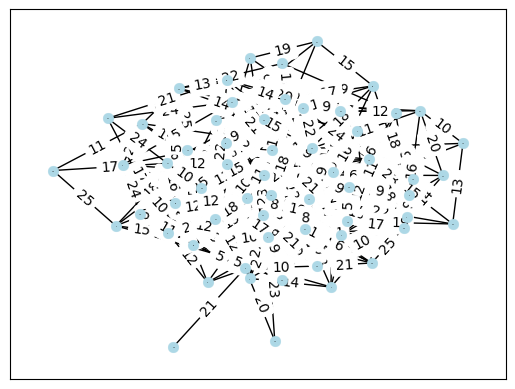

In [345]:
CityMap.visualize_city_map(r4_city_map, location_size=60, location_font_size=1, road_widths=1)

In [346]:
r4_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r4_city_map, r3_r4_trips, shrinkage_factor=0.8)
r4_benefit_matrix

,source,destination,benefit
1269,12,56,1510.6
273,0,49,1371.4
437,14,18,1350.0
968,33,45,1208.2
1187,29,31,1183.2
...,...,...,...
816,17,43,48.4
39,6,15,48.0
1407,13,43,48.0
1133,11,33,30.8


In [347]:
##### k = 2 # Recommended road to build first is the road segment
r4_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r4_benefit_matrix)
r4_max_benefit_matrix

,source,destination,benefit
1269,12,56,1510.6


In [348]:
source, destination = get_max_benefit_road_segment(r4_max_benefit_matrix)
print(f"({source}, {destination})")

(12, 56)


In [349]:
CityMap.add_road_segment(r4_city_map, source, destination)

{(0, 20): 10, (0, 3): 15, (0, 35): 16, (0, 59): 14, (0, 14): 11, (0, 27): 25, (0, 47): 20, (0, 32): 17, (0, 5): 12, (1, 12): 14, (1, 52): 25, (1, 50): 24, (1, 58): 23, (1, 39): 17, (1, 15): 7, (1, 13): 20, (1, 8): 16, (1, 22): 24, (2, 11): 14, (2, 3): 10, (2, 54): 23, (2, 8): 25, (2, 48): 6, (2, 20): 12, (3, 10): 12, (3, 38): 25, (3, 13): 18, (3, 31): 6, (4, 22): 25, (4, 14): 23, (4, 55): 16, (4, 6): 16, (4, 44): 24, (4, 5): 8, (4, 45): 15, (4, 15): 22, (5, 18): 25, (5, 31): 7, (5, 54): 8, (6, 25): 10, (6, 45): 25, (6, 31): 19, (6, 12): 9, (6, 46): 20, (6, 27): 12, (6, 21): 5, (6, 36): 21, (7, 12): 5, (7, 18): 11, (7, 22): 14, (7, 25): 10, (7, 45): 6, (8, 14): 7, (8, 23): 7, (8, 40): 5, (8, 35): 15, (8, 52): 5, (8, 51): 24, (8, 15): 24, (8, 34): 25, (8, 42): 20, (9, 31): 20, (9, 28): 12, (9, 56): 16, (9, 49): 17, (9, 48): 13, (9, 55): 11, (9, 46): 23, (9, 11): 22, (9, 47): 23, (9, 45): 5, (9, 58): 5, (10, 29): 19, (10, 16): 12, (10, 45): 20, (10, 54): 19, (10, 50): 9, (10, 30): 8, (10,

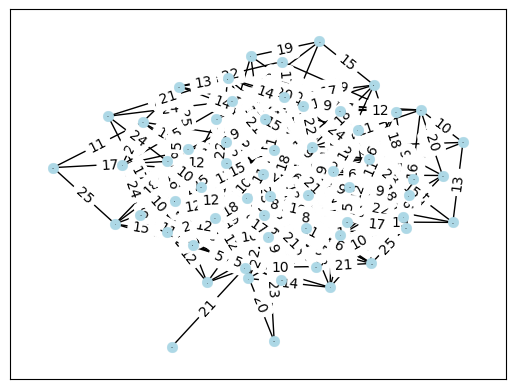

In [350]:
CityMap.visualize_city_map(r4_city_map, location_size=60, location_font_size=1, road_widths=1)

In [351]:
r4_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r4_city_map, r3_r4_trips, shrinkage_factor=0.8)
r4_benefit_matrix

,source,destination,benefit
98,12,34,1398.20
273,0,49,1371.40
437,14,18,1350.00
968,33,45,1208.20
1187,29,31,1183.20
...,...,...,...
39,6,15,48.00
1406,13,43,48.00
1369,29,56,47.52
1133,11,33,30.80


In [352]:
##### k = 3 # Recommended road to build last is the road segment
r4_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r4_benefit_matrix)
r4_max_benefit_matrix

,source,destination,benefit
98,12,34,1398.2


In [353]:
source, destination = get_max_benefit_road_segment(r4_max_benefit_matrix)
print(f"({source}, {destination})")

(12, 34)


In [354]:
CityMap.add_road_segment(r4_city_map, source, destination)

{(0, 20): 10, (0, 3): 15, (0, 35): 16, (0, 59): 14, (0, 14): 11, (0, 27): 25, (0, 47): 20, (0, 32): 17, (0, 5): 12, (1, 12): 14, (1, 52): 25, (1, 50): 24, (1, 58): 23, (1, 39): 17, (1, 15): 7, (1, 13): 20, (1, 8): 16, (1, 22): 24, (2, 11): 14, (2, 3): 10, (2, 54): 23, (2, 8): 25, (2, 48): 6, (2, 20): 12, (3, 10): 12, (3, 38): 25, (3, 13): 18, (3, 31): 6, (4, 22): 25, (4, 14): 23, (4, 55): 16, (4, 6): 16, (4, 44): 24, (4, 5): 8, (4, 45): 15, (4, 15): 22, (5, 18): 25, (5, 31): 7, (5, 54): 8, (6, 25): 10, (6, 45): 25, (6, 31): 19, (6, 12): 9, (6, 46): 20, (6, 27): 12, (6, 21): 5, (6, 36): 21, (7, 12): 5, (7, 18): 11, (7, 22): 14, (7, 25): 10, (7, 45): 6, (8, 14): 7, (8, 23): 7, (8, 40): 5, (8, 35): 15, (8, 52): 5, (8, 51): 24, (8, 15): 24, (8, 34): 25, (8, 42): 20, (9, 31): 20, (9, 28): 12, (9, 56): 16, (9, 49): 17, (9, 48): 13, (9, 55): 11, (9, 46): 23, (9, 11): 22, (9, 47): 23, (9, 45): 5, (9, 58): 5, (10, 29): 19, (10, 16): 12, (10, 45): 20, (10, 54): 19, (10, 50): 9, (10, 30): 8, (10,

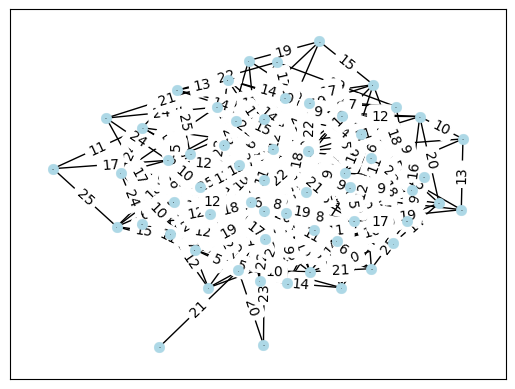

In [355]:
CityMap.visualize_city_map(r4_city_map, location_size=60, location_font_size=1, road_widths=1)

# R5

In [356]:
r5_city_map = Simulator.generate_map(connectedness=0.10)
r5_city_map

In [357]:
CityMap.get_city_map_statistics(r5_city_map)

node degree and node clustering
0 9 0.08333333333333333
1 9 0.1111111111111111
2 6 0.06666666666666667
3 6 0
4 8 0.14285714285714285
5 5 0
6 9 0.1388888888888889
7 5 0.1
8 11 0.16363636363636364
9 11 0.16363636363636364
10 8 0.03571428571428571
11 6 0.26666666666666666
12 12 0.13636363636363635
13 10 0.08888888888888889
14 16 0.11666666666666667
15 7 0.2857142857142857
16 9 0.05555555555555555
17 6 0.06666666666666667
18 11 0.07272727272727272
19 4 0.3333333333333333
20 6 0.06666666666666667
21 9 0.19444444444444445
22 5 0.1
23 8 0.21428571428571427
24 6 0.2
25 7 0.09523809523809523
26 6 0.2
27 9 0.2222222222222222
28 6 0.13333333333333333
29 11 0.16363636363636364
30 7 0.14285714285714285
31 13 0.16666666666666666
32 4 0.16666666666666666
33 7 0.047619047619047616
34 10 0.08888888888888889
35 5 0.1
36 1 0
37 4 0
38 3 0
39 7 0.14285714285714285
40 11 0.16363636363636364
41 7 0.09523809523809523
42 10 0.13333333333333333
43 8 0.03571428571428571
44 8 0.14285714285714285
45 16 0.09166666

{(0, 20): 7, (0, 3): 16, (0, 35): 6, (0, 59): 15, (0, 14): 19, (0, 27): 13, (0, 47): 16, (0, 32): 14, (0, 5): 5, (1, 12): 17, (1, 52): 6, (1, 50): 8, (1, 58): 6, (1, 39): 11, (1, 15): 9, (1, 13): 23, (1, 8): 12, (1, 22): 6, (2, 11): 22, (2, 3): 7, (2, 54): 21, (2, 8): 19, (2, 48): 25, (2, 20): 20, (3, 10): 17, (3, 38): 22, (3, 13): 17, (3, 31): 20, (4, 22): 8, (4, 14): 22, (4, 55): 7, (4, 6): 13, (4, 44): 10, (4, 5): 24, (4, 45): 8, (4, 15): 23, (5, 18): 22, (5, 31): 7, (5, 54): 18, (6, 25): 23, (6, 45): 11, (6, 31): 16, (6, 12): 7, (6, 46): 13, (6, 27): 17, (6, 21): 5, (6, 36): 25, (7, 12): 15, (7, 18): 21, (7, 22): 20, (7, 25): 8, (7, 45): 14, (8, 14): 6, (8, 23): 12, (8, 40): 5, (8, 35): 20, (8, 52): 13, (8, 51): 7, (8, 15): 14, (8, 34): 8, (8, 42): 8, (9, 31): 6, (9, 28): 13, (9, 56): 18, (9, 49): 8, (9, 48): 18, (9, 55): 25, (9, 46): 18, (9, 11): 5, (9, 47): 21, (9, 45): 16, (9, 58): 13, (10, 29): 9, (10, 16): 11, (10, 45): 13, (10, 54): 8, (10, 50): 22, (10, 30): 20, (10, 42): 9,

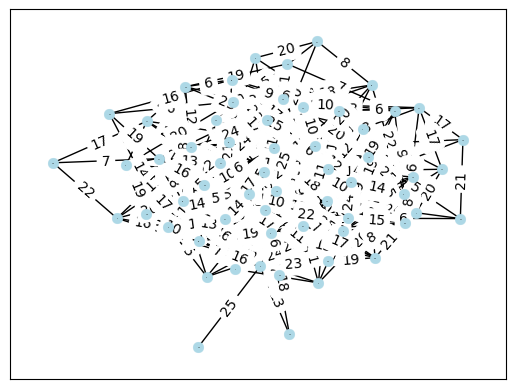

In [358]:
CityMap.visualize_city_map(r5_city_map, location_size=60, location_font_size=1, road_widths=1)

In [359]:
r5_trips = Simulator.generate_trips(city_map,
                                 traffic_start_datetime,
                                 traffic_end_datetime,
                                 TimeDeltaDiff.SECONDS)
r5_number_of_trips = 0

for trip in r5_trips:
    r5_number_of_trips += trip.numer_of_trips

r5_number_of_trips

36000

In [360]:
r5_trips

{Trip(source=2, destination=35, numer_of_trips=9): Trip(source=2, destination=35, numer_of_trips=9),
 Trip(source=46, destination=55, numer_of_trips=10): Trip(source=46, destination=55, numer_of_trips=10),
 Trip(source=15, destination=37, numer_of_trips=13): Trip(source=15, destination=37, numer_of_trips=13),
 Trip(source=56, destination=24, numer_of_trips=11): Trip(source=56, destination=24, numer_of_trips=11),
 Trip(source=59, destination=32, numer_of_trips=10): Trip(source=59, destination=32, numer_of_trips=10),
 Trip(source=0, destination=28, numer_of_trips=13): Trip(source=0, destination=28, numer_of_trips=13),
 Trip(source=59, destination=51, numer_of_trips=11): Trip(source=59, destination=51, numer_of_trips=11),
 Trip(source=42, destination=43, numer_of_trips=12): Trip(source=42, destination=43, numer_of_trips=12),
 Trip(source=12, destination=20, numer_of_trips=7): Trip(source=12, destination=20, numer_of_trips=7),
 Trip(source=24, destination=58, numer_of_trips=10): Trip(sourc

In [361]:
r5_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r5_city_map, r5_trips)
r5_benefit_matrix

,source,destination,benefit
1318,12,23,3640.0
98,12,34,3002.8
304,23,45,2896.0
112,12,47,2834.0
1240,31,43,2794.6
...,...,...,...
792,17,53,93.6
1257,1,33,89.6
1206,5,59,86.0
85,35,40,83.6


In [362]:
##### k = 1 # Recommended road to build first is the road segment
r5_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r5_benefit_matrix)
r5_max_benefit_matrix

,source,destination,benefit
1318,12,23,3640.0


In [363]:
source, destination = get_max_benefit_road_segment(r5_max_benefit_matrix)
print(f"({source}, {destination})")

(12, 23)


In [364]:
CityMap.add_road_segment(r5_city_map, source, destination)

{(0, 20): 7, (0, 3): 16, (0, 35): 6, (0, 59): 15, (0, 14): 19, (0, 27): 13, (0, 47): 16, (0, 32): 14, (0, 5): 5, (1, 12): 17, (1, 52): 6, (1, 50): 8, (1, 58): 6, (1, 39): 11, (1, 15): 9, (1, 13): 23, (1, 8): 12, (1, 22): 6, (2, 11): 22, (2, 3): 7, (2, 54): 21, (2, 8): 19, (2, 48): 25, (2, 20): 20, (3, 10): 17, (3, 38): 22, (3, 13): 17, (3, 31): 20, (4, 22): 8, (4, 14): 22, (4, 55): 7, (4, 6): 13, (4, 44): 10, (4, 5): 24, (4, 45): 8, (4, 15): 23, (5, 18): 22, (5, 31): 7, (5, 54): 18, (6, 25): 23, (6, 45): 11, (6, 31): 16, (6, 12): 7, (6, 46): 13, (6, 27): 17, (6, 21): 5, (6, 36): 25, (7, 12): 15, (7, 18): 21, (7, 22): 20, (7, 25): 8, (7, 45): 14, (8, 14): 6, (8, 23): 12, (8, 40): 5, (8, 35): 20, (8, 52): 13, (8, 51): 7, (8, 15): 14, (8, 34): 8, (8, 42): 8, (9, 31): 6, (9, 28): 13, (9, 56): 18, (9, 49): 8, (9, 48): 18, (9, 55): 25, (9, 46): 18, (9, 11): 5, (9, 47): 21, (9, 45): 16, (9, 58): 13, (10, 29): 9, (10, 16): 11, (10, 45): 13, (10, 54): 8, (10, 50): 22, (10, 30): 20, (10, 42): 9,

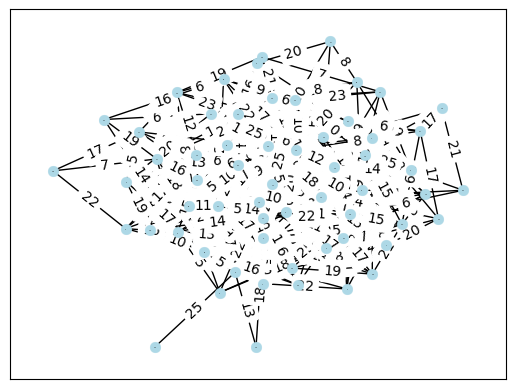

In [365]:
CityMap.visualize_city_map(r5_city_map, location_size=60, location_font_size=1, road_widths=1)

In [366]:
r5_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r5_city_map, r5_trips)
r5_benefit_matrix

,source,destination,benefit
98,12,34,2942.8
112,12,47,2872.0
1240,31,43,2794.6
969,33,45,2721.8
551,0,31,2717.0
...,...,...,...
792,17,53,93.6
1257,1,33,89.6
1206,5,59,86.0
85,35,40,83.6


In [367]:
##### k = 2 # Recommended road to build first is the road segment
r5_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r5_benefit_matrix)
r5_max_benefit_matrix

,source,destination,benefit
98,12,34,2942.8


In [368]:
source, destination = get_max_benefit_road_segment(r5_max_benefit_matrix)
print(f"({source}, {destination})")

(12, 34)


In [369]:
CityMap.add_road_segment(r5_city_map, source, destination)

{(0, 20): 7, (0, 3): 16, (0, 35): 6, (0, 59): 15, (0, 14): 19, (0, 27): 13, (0, 47): 16, (0, 32): 14, (0, 5): 5, (1, 12): 17, (1, 52): 6, (1, 50): 8, (1, 58): 6, (1, 39): 11, (1, 15): 9, (1, 13): 23, (1, 8): 12, (1, 22): 6, (2, 11): 22, (2, 3): 7, (2, 54): 21, (2, 8): 19, (2, 48): 25, (2, 20): 20, (3, 10): 17, (3, 38): 22, (3, 13): 17, (3, 31): 20, (4, 22): 8, (4, 14): 22, (4, 55): 7, (4, 6): 13, (4, 44): 10, (4, 5): 24, (4, 45): 8, (4, 15): 23, (5, 18): 22, (5, 31): 7, (5, 54): 18, (6, 25): 23, (6, 45): 11, (6, 31): 16, (6, 12): 7, (6, 46): 13, (6, 27): 17, (6, 21): 5, (6, 36): 25, (7, 12): 15, (7, 18): 21, (7, 22): 20, (7, 25): 8, (7, 45): 14, (8, 14): 6, (8, 23): 12, (8, 40): 5, (8, 35): 20, (8, 52): 13, (8, 51): 7, (8, 15): 14, (8, 34): 8, (8, 42): 8, (9, 31): 6, (9, 28): 13, (9, 56): 18, (9, 49): 8, (9, 48): 18, (9, 55): 25, (9, 46): 18, (9, 11): 5, (9, 47): 21, (9, 45): 16, (9, 58): 13, (10, 29): 9, (10, 16): 11, (10, 45): 13, (10, 54): 8, (10, 50): 22, (10, 30): 20, (10, 42): 9,

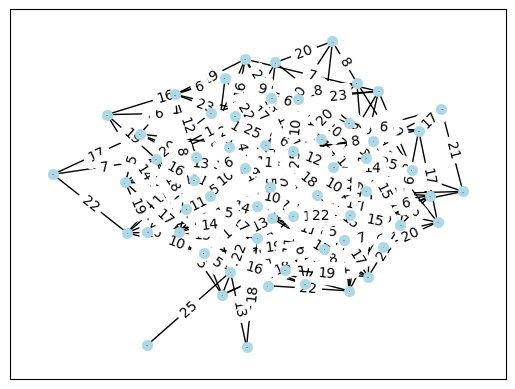

In [370]:
CityMap.visualize_city_map(r5_city_map, location_size=60, location_font_size=1, road_widths=1)

In [371]:
r5_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r5_city_map, r5_trips)
r5_benefit_matrix

,source,destination,benefit
968,33,45,2721.8
550,0,31,2717.0
454,24,45,2656.0
1239,31,43,2642.8
227,6,40,2639.4
...,...,...,...
791,17,53,93.6
1256,1,33,89.6
1205,5,59,86.0
85,35,40,83.6


In [372]:
##### k = 3 # Recommended road to build last is the road segment
r5_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r5_benefit_matrix)
r5_max_benefit_matrix

,source,destination,benefit
968,33,45,2721.8


In [373]:
source, destination = get_max_benefit_road_segment(r5_max_benefit_matrix)
print(f"({source}, {destination})")

(33, 45)


In [374]:
CityMap.add_road_segment(r5_city_map, source, destination)

{(0, 20): 7, (0, 3): 16, (0, 35): 6, (0, 59): 15, (0, 14): 19, (0, 27): 13, (0, 47): 16, (0, 32): 14, (0, 5): 5, (1, 12): 17, (1, 52): 6, (1, 50): 8, (1, 58): 6, (1, 39): 11, (1, 15): 9, (1, 13): 23, (1, 8): 12, (1, 22): 6, (2, 11): 22, (2, 3): 7, (2, 54): 21, (2, 8): 19, (2, 48): 25, (2, 20): 20, (3, 10): 17, (3, 38): 22, (3, 13): 17, (3, 31): 20, (4, 22): 8, (4, 14): 22, (4, 55): 7, (4, 6): 13, (4, 44): 10, (4, 5): 24, (4, 45): 8, (4, 15): 23, (5, 18): 22, (5, 31): 7, (5, 54): 18, (6, 25): 23, (6, 45): 11, (6, 31): 16, (6, 12): 7, (6, 46): 13, (6, 27): 17, (6, 21): 5, (6, 36): 25, (7, 12): 15, (7, 18): 21, (7, 22): 20, (7, 25): 8, (7, 45): 14, (8, 14): 6, (8, 23): 12, (8, 40): 5, (8, 35): 20, (8, 52): 13, (8, 51): 7, (8, 15): 14, (8, 34): 8, (8, 42): 8, (9, 31): 6, (9, 28): 13, (9, 56): 18, (9, 49): 8, (9, 48): 18, (9, 55): 25, (9, 46): 18, (9, 11): 5, (9, 47): 21, (9, 45): 16, (9, 58): 13, (10, 29): 9, (10, 16): 11, (10, 45): 13, (10, 54): 8, (10, 50): 22, (10, 30): 20, (10, 42): 9,

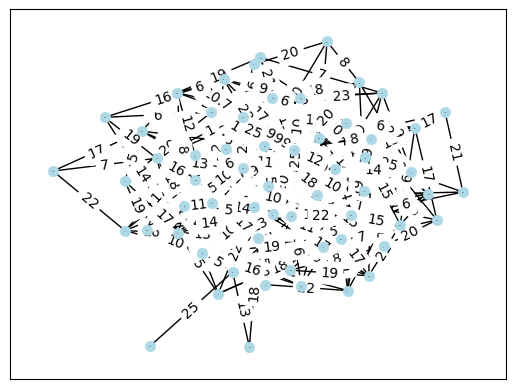

In [375]:
CityMap.visualize_city_map(r5_city_map, location_size=60, location_font_size=1, road_widths=1)